### Why are you interested in working for the Detroit Red Wings? [250 words]

I have an extensive background of performing descriptive and prescriptive analyses from my career as a Department of Defense analyst. My career also gave me a substantial amount of experience communicating highly technical results to audiences of all flavors. Unfortunately, I did not explicitly dive into predictive modeling which is why I returned to school for Data Science. The combination of my career, my degree, and my passion for sports makes the opportunity with the Red Wings a perfect fit for me. I am quite interested in uncovering new methods of player evaluation using the player and puck tracking data and have a history of thinking outside the box to solve complex problems which will be required given the amount of data available. I am very excited at the prospect of being able to contribute to the Red Wings as we move further into the analytics movement. 

### Describe a research project you would like to explore using a dataset with puck and player locations that would add value to an NHL organization and explain the impact you think the research would have. [250 words]

My research project using puck and player tracking would involve determining optimal player placement while on the power play / penalty kill. To the naive eye, it appears as if most power plays have adapted the same general structure with a point man, three forwards equally spaced circle to circle, and a skater behind the net. These positions are somewhat dynamic based on puck location, but are generally locked in. I would like to explore the impact on power play performance based on different possible formations and see if we can improve the amount of xG generated by dynamically changing the formation. The goal would be to give the Red Wings a distinct advantage while on the power play.

### Please give a brief overview of your experience with predictive modeling as well as a description of an analytical project that you have completed. Include the purpose of the project, the methods or models chosen, any additional methods or models that were tested, and what tools or programming languages you used to complete the project. This project does not need to relate to hockey. [250 words]

As I mentioned in the interest question, I returned to school for Data Science to gain more skills specifically in the predictive modeling space. In my Applied Machine Learning class, my group and I built a model that predicted the spread of NBA games using features defined by a team's recent performance. The goal was to build a model that could be comparable to a Vegas point spread (a very lofty goal). Our process started simple and moved to the complex, which I believe is how all model projects should proceed. We began with simple linear regressions using different combinations of features, moved to Feed Forward Neural Networks to try to improve predictive performance, tried a Neural Network with Embeddings and a Convolutional Neural Network, and ultimately landed on a highly complex Long-Short Term Memory Network that showed the most promising performance. We evaluated performance based on mean squared error of untrained on test data. All models were run using TensorFlow in Python, and all data was scraped from the Basketball Reference API. 

### Broadly, how would you structure National Hockey League projections to provide distributions of outcomes rather than just point estimates? You do not need to provide code, just high-level structure. [250 words]

If the projections come from a simulation, my initial thought is to run the simulation in a Monte Carlo fashion where you have a series of seeds to generate a distribution of outcomes for the projection. From there, you can develop confidence intervals around the outcome and get a more accurate understanding of the range of potential outcomes. If the projection comes from a complex model, I would perform the same general task but re-running the model with different randomization seeds to generate a range of potential outcomes as defined by the model. This may take some time given the model complexity but would be useful in helping to determine the range of goals that may be scored by a particular player, as an example.

### Attached is a sample of shot-level data (shotData.csv) from four different forwards. Please construct a model predicting the probability of a goal for each shot and explain how you evaluated your model. In addition, rank the four players from best shooting ability to worst and explain how you arrived at these rankings. Please include all code.

**Load Packages**

In [1]:
# Must-have packages
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

**Read in Data**

In [2]:
df = pd.read_csv("./shotData.csv")

In [3]:
df.head()

,playerId,period,periodTime,gameTime,screen,shooterUnderPressure,locationOnNet,oneTimer,shotXCoord,shotYCoord,manpowerSituation,strength,deflectionX,deflectionY,shotType,teamPossessionStartX,teamPossessionStartTime,playerPossessionStartX,playerPossessionStartY,playerPossessionStartTime,lastFaceoffX,lastFaceoffY,lastFaceoffTime,lastFaceoffOutcome,ozEntryType,entryType,entryTime,ozEntryX,ozEntryY,closestDefenderToShooterX,closestDefenderToShooterY,precedingEventOneType,precedingEventOneX,precedingEventOneY,precedingEventOneTime,precedingEventTwoType,precedingEventTwoX,precedingEventTwoY,precedingEventTwoTime,precedingEventThreeType,precedingEventThreeX,precedingEventThreeY,precedingEventThreeTime,shotResult
0,1,2,819.40,2019.40,1,1,lowright,0,44.060898,-15.338234,evenStrength,5-1v5-1,NaN,NaN,wristshot,65.687360,2008.60,67.699130,-27.911766,2016.13,69.207950,-22.379410,2006.03,won,NaN,NaN,NaN,NaN,NaN,42.552063,-12.320587,pass,72.225600,-39.982353,2015.87,pass,65.687360,-28.414703,2008.63,NaN,NaN,NaN,NaN,save
1,1,3,772.93,3172.93,0,1,highright,0,78.153820,-23.388235,evenStrength,5-1v5-1,NaN,NaN,snapshot,-61.160890,3166.67,70.106760,-17.352942,3172.50,68.597930,21.876472,3121.53,won,controlledentry,2on2,3170.40,-32.394060,-2.604038,78.161705,-17.010670,shot,56.023544,-12.819504,3171.70,pass,-11.369713,34.952940,3168.83,pass,-57.640305,21.876472,3167.20,missed
2,1,3,1029.63,3429.63,0,1,lowleft,0,64.071465,22.882355,evenStrength,5-1v5-1,NaN,NaN,wristshot,4.724403,3427.40,4.724403,38.976470,3427.40,-69.207950,22.379410,3273.07,won,controlledentry,1on1,3428.17,-83.183230,-2.764706,63.065580,19.864708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,save
3,1,1,748.03,748.03,0,0,highleft,0,95.360886,8.802940,evenStrength,5-1v5-1,NaN,NaN,snapshot,-96.259700,721.27,96.869720,9.305881,748.00,-0.197929,-0.250000,716.03,lost,controlledentry,2on3,728.50,-33.499130,10.308823,97.372650,13.832354,pass,79.266770,-39.479410,742.63,pass,46.575592,-37.467644,741.00,pass,31.990310,-39.479410,739.97,save
4,1,3,920.20,3320.20,0,0,highleft,1,77.757950,12.323528,evenStrength,5-1v5-1,NaN,NaN,snapshot,-89.218520,3306.27,76.249130,11.820587,3320.20,-19.812637,-22.379410,3247.80,lost,controlledentry,2on3,3312.43,-35.510895,-18.358824,80.775604,3.270588,pass,86.307950,-7.794117,3319.00,shot,86.810900,-14.332352,3318.17,pass,42.552063,38.979412,3314.53,missed


**Convert shotResult outcome variable to a boolean for use by our models**

In [4]:
df['shotResult'].unique()

array(['save', 'missed', 'goal', 'blocked'], dtype=object)

In [5]:
outcome_mapping = {'save': 0,
                   'missed': 0,
                   'goal': 1,
                   'blocked': 0}

In [6]:
df = df.assign(shotResult = df['shotResult'].map(outcome_mapping))

<AxesSubplot: >

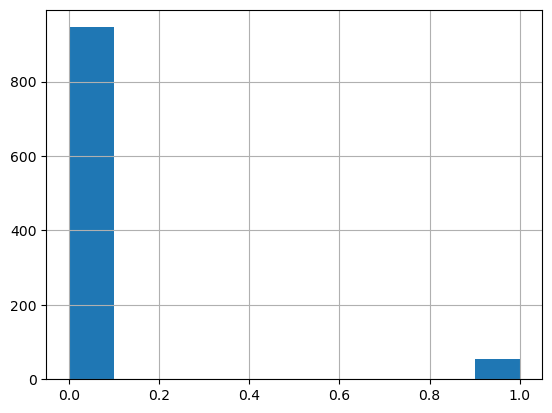

In [7]:
df['shotResult'].hist()

In [8]:
len(df['shotResult'][df['shotResult'] == 0])/len(df['shotResult'])

0.946

There is a significant amount of class imbalance (as expected, there are many more shots than goals), but this may make it difficult for a logistic regression to handle. Since it is the simplest model for this classfication task, we will start with it and then move to a more complex model if necessary. As a baseline, if the model predicted every shot was not a goal, it would have 94.6% accuracy as calculated above. We will try to create a model that performs better than that.

**Subset the dataframe to only include columns that will be used by the model**

The set of data below is what I chose to use to create the model. They seemed to be the most relevant categories to whether or not a shot would result in a goal. It would be interesting in a future study to incorporate some sort of time series elements based on previous events, but that, in my opinion, is beyond the scope of this initial assessment.

In [9]:
df_xg = df.loc[:,['screen',
                  'shooterUnderPressure',
                  'locationOnNet',
                  'oneTimer',
                  'shotXCoord',
                  'shotYCoord',
                  'manpowerSituation',
                  'strength',
                  'shotType',
                  'ozEntryType',
                  'entryType',
                  'closestDefenderToShooterX',
                  'closestDefenderToShooterY',
                  'shotResult']]

**Convert categorical variables to dummies for use by the model**

In [10]:
df_xg = pd.get_dummies(data = df_xg,
                       columns = ['locationOnNet',
                                  'manpowerSituation',
                                  'strength',
                                  'shotType',
                                  'ozEntryType',
                                  'entryType'])

**Create X and y dataframes**

In [11]:
X = df_xg.drop(['shotResult'], axis = 1)
y = df_xg['shotResult']

**Standardize data for use by the logistic regression**

In [12]:
indices = df_xg.index.values

X_train, X_test, index_train, index_test = train_test_split(X, indices, test_size = 0.2)
y_train, y_test = y[index_train], y[index_test]

sc_X = StandardScaler()
sc_X.fit(X_train)
X_train_std = sc_X.transform(X_train)
X_test_std  = sc_X.transform(X_test)

**Fit and predict using the logistic regression**

In [13]:
lr = LogisticRegression()

In [14]:
lr.fit(X_train_std, y_train)

LogisticRegression()

In [15]:
y_pred = lr.predict(X_test_std)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.925


As you can see, the model accuracy is just below that of predicting no goal every time. Let's check out some summary statistics of this model before we move to a more complex on that can hopefully perform a bit better.

(array([171.,  19.,   2.,   4.,   0.,   1.,   0.,   0.,   0.,   3.]),
 array([3.54990568e-06, 9.89454403e-02, 1.97887331e-01, 2.96829221e-01,
        3.95771112e-01, 4.94713002e-01, 5.93654892e-01, 6.92596783e-01,
        7.91538673e-01, 8.90480563e-01, 9.89422454e-01]),
 <BarContainer object of 10 artists>)

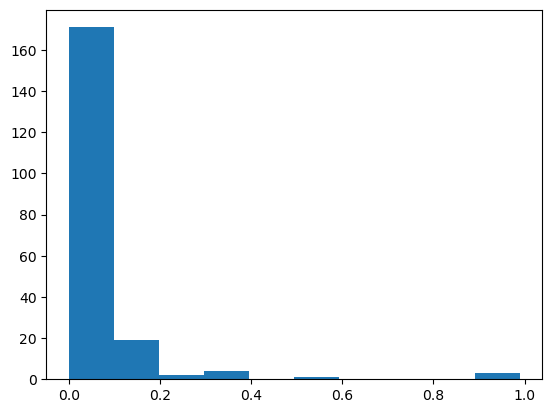

In [16]:
y_xg = lr.predict_proba(X_test_std)[:,1]
plt.hist(y_xg)

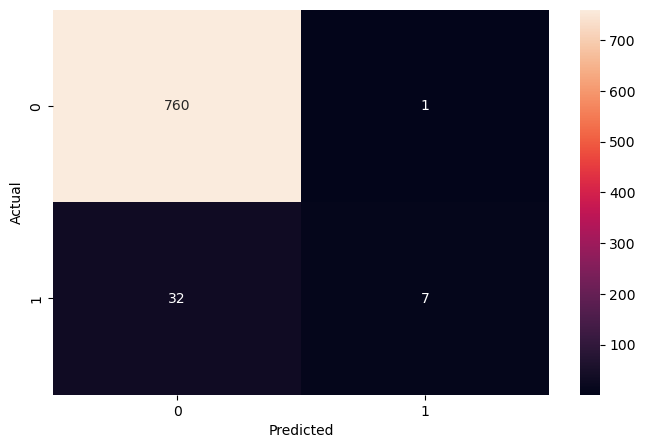

In [17]:
y_lr_train = lr.predict(X_train_std)

cm_lr_train = confusion_matrix(y_train,y_lr_train)

plt.figure(figsize = (8,5))
sns.heatmap(cm_lr_train, annot=True, fmt='.0f')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

As expected, the model has a difficult time predicting goals since they are such rare events in the context of the data we have available. This could potentially be solved by up- or down-sampling goal events and seeing how the model may perform but I think it is best at this point to try a more advanced model to see how it performs.

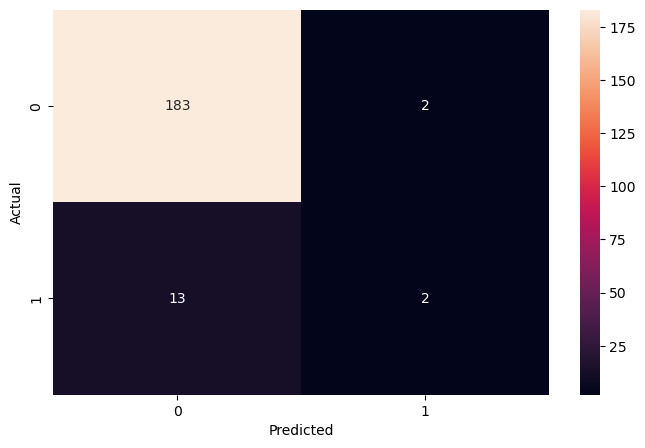

In [18]:
y_lr_test = lr.predict(X_test_std)

cm_lr_test = confusion_matrix(y_test,y_lr_test)

plt.figure(figsize = (8,5))
sns.heatmap(cm_lr_test, annot=True, fmt='.0f')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Fit random forest model (NOTE: you don't need to use standardized data in a random forest, but it doesn't impact performance so we may as well use it).**

In [19]:
rf = RandomForestClassifier().fit(X_train_std, y_train)

y_pred = rf.predict(X_test_std)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.925


This model performs as well as the logisitic regression. Let's see how the confusion matrices look.

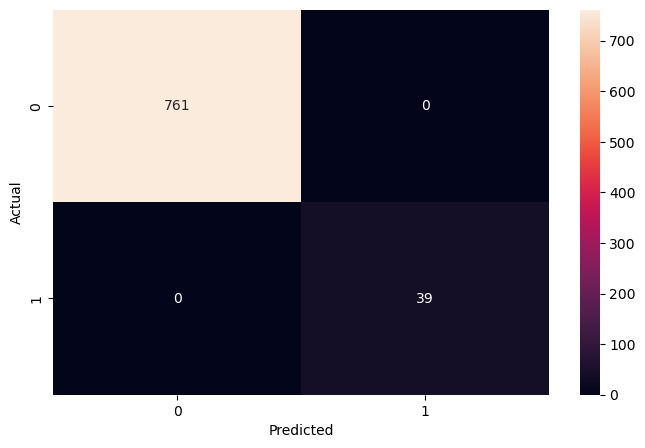

In [20]:
y_rf_train = rf.predict(X_train_std)

cm_rf_train = confusion_matrix(y_train,y_rf_train)

plt.figure(figsize = (8,5))
sns.heatmap(cm_rf_train, annot=True, fmt='.0f')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

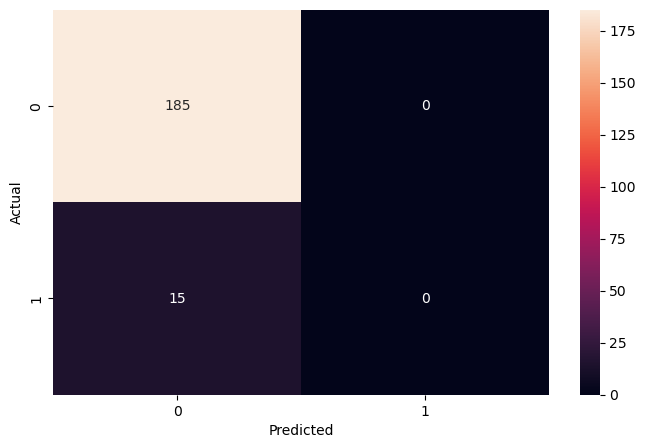

In [21]:
y_rf_test = rf.predict(X_test_std)

cm_rf_test = confusion_matrix(y_test,y_rf_test)

plt.figure(figsize = (8,5))
sns.heatmap(cm_rf_test, annot=True, fmt='.0f')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

It's clear the model is overfit to the training data since it predicted the training set with perfect accuracy and predicted zero goals in the test set. Let's see if we can prune the tree a bit and improve test performance. To keep the goal in mind, we are trying to come up with the best probability model for determining whether or not a shot resulted in a goal. Overfitting could cause some artificially high probabilities on goals and misses, which is why we want to try to solve the problem. To accomplish the pruning I will use GridSearchCV with a set of hyperparameters to tune for the given model. I will also use the F1 score to optimize the grid search since we aren't exclusively interested in accuracy but the balance of precision and recall.

In [22]:
grid_space={'max_depth':[3,5,10,None],
            'n_estimators':[10,100,200],
            'min_samples_leaf':[1,2,3],
            'min_samples_split':[2,4,6]}

In [23]:
rf_pruned = RandomForestClassifier()

grid = GridSearchCV(rf_pruned,param_grid=grid_space,cv=3,scoring='f1')
model_grid = grid.fit(X,y)

In [24]:
print(model_grid.best_params_)
print(model_grid.best_score_)

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
0.06666666666666667


In [25]:
rf_optimized = RandomForestClassifier(max_depth = None, 
                                      min_samples_leaf = 1, 
                                      min_samples_split = 4,
                                      n_estimators = 10).fit(X_train_std, y_train)

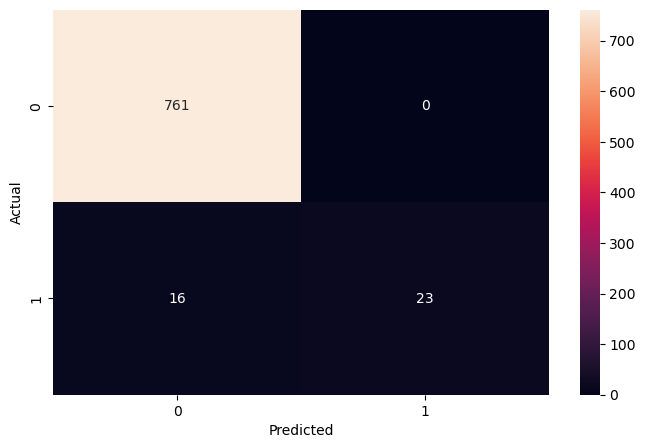

In [26]:
y_rfo_train = rf_optimized.predict(X_train_std)

cm_rfo_train = confusion_matrix(y_train,y_rfo_train)

plt.figure(figsize = (8,5))
sns.heatmap(cm_rfo_train, annot=True, fmt='.0f')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

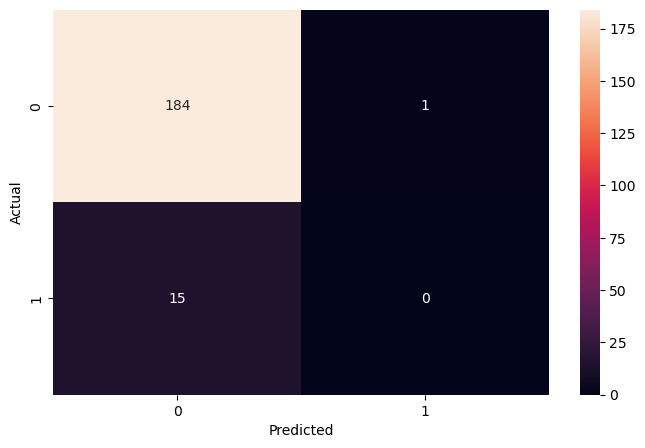

In [27]:
y_rfo_test = rf_optimized.predict(X_test_std)

cm_rfo_test = confusion_matrix(y_test,y_rfo_test)

plt.figure(figsize = (8,5))
sns.heatmap(cm_rfo_test, annot=True, fmt='.0f')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The "optimized" model still performs poorly on the test set but should be less overfit than the previous model. This seems as if it is the best model for the problem and I will use it to calculate the xG probabilities.

In [28]:
train_prob = rf.predict_proba(X_train_std)
test_prob  = rf.predict_proba(X_test_std)

In [29]:
df.loc[index_train, "xGoal"] = train_prob[:,1]
df.loc[index_test, "xGoal"]  = test_prob[:,1]

In [30]:
df.head()

,playerId,period,periodTime,gameTime,screen,shooterUnderPressure,locationOnNet,oneTimer,shotXCoord,shotYCoord,manpowerSituation,strength,deflectionX,deflectionY,shotType,teamPossessionStartX,teamPossessionStartTime,playerPossessionStartX,playerPossessionStartY,playerPossessionStartTime,lastFaceoffX,lastFaceoffY,lastFaceoffTime,lastFaceoffOutcome,ozEntryType,entryType,entryTime,ozEntryX,ozEntryY,closestDefenderToShooterX,closestDefenderToShooterY,precedingEventOneType,precedingEventOneX,precedingEventOneY,precedingEventOneTime,precedingEventTwoType,precedingEventTwoX,precedingEventTwoY,precedingEventTwoTime,precedingEventThreeType,precedingEventThreeX,precedingEventThreeY,precedingEventThreeTime,shotResult,xGoal
0,1,2,819.40,2019.40,1,1,lowright,0,44.060898,-15.338234,evenStrength,5-1v5-1,NaN,NaN,wristshot,65.687360,2008.60,67.699130,-27.911766,2016.13,69.207950,-22.379410,2006.03,won,NaN,NaN,NaN,NaN,NaN,42.552063,-12.320587,pass,72.225600,-39.982353,2015.87,pass,65.687360,-28.414703,2008.63,NaN,NaN,NaN,NaN,0,0.00
1,1,3,772.93,3172.93,0,1,highright,0,78.153820,-23.388235,evenStrength,5-1v5-1,NaN,NaN,snapshot,-61.160890,3166.67,70.106760,-17.352942,3172.50,68.597930,21.876472,3121.53,won,controlledentry,2on2,3170.40,-32.394060,-2.604038,78.161705,-17.010670,shot,56.023544,-12.819504,3171.70,pass,-11.369713,34.952940,3168.83,pass,-57.640305,21.876472,3167.20,0,0.00
2,1,3,1029.63,3429.63,0,1,lowleft,0,64.071465,22.882355,evenStrength,5-1v5-1,NaN,NaN,wristshot,4.724403,3427.40,4.724403,38.976470,3427.40,-69.207950,22.379410,3273.07,won,controlledentry,1on1,3428.17,-83.183230,-2.764706,63.065580,19.864708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.04
3,1,1,748.03,748.03,0,0,highleft,0,95.360886,8.802940,evenStrength,5-1v5-1,NaN,NaN,snapshot,-96.259700,721.27,96.869720,9.305881,748.00,-0.197929,-0.250000,716.03,lost,controlledentry,2on3,728.50,-33.499130,10.308823,97.372650,13.832354,pass,79.266770,-39.479410,742.63,pass,46.575592,-37.467644,741.00,pass,31.990310,-39.479410,739.97,0,0.04
4,1,3,920.20,3320.20,0,0,highleft,1,77.757950,12.323528,evenStrength,5-1v5-1,NaN,NaN,snapshot,-89.218520,3306.27,76.249130,11.820587,3320.20,-19.812637,-22.379410,3247.80,lost,controlledentry,2on3,3312.43,-35.510895,-18.358824,80.775604,3.270588,pass,86.307950,-7.794117,3319.00,shot,86.810900,-14.332352,3318.17,pass,42.552063,38.979412,3314.53,0,0.05


In [31]:
player_1 = df[df['playerId'] == 1]
player_2 = df[df['playerId'] == 2]
player_3 = df[df['playerId'] == 3]
player_4 = df[df['playerId'] == 4]

To assess how well a player shoots I will start by creating some heatmaps of their shot coordinates. Unfortunately, we were not provided with a data dictionary for the shotData.csv so I'm not exactly sure what the coordinates are (units, positions, etc.). I will assume that (0,0) is the center of the net. I am assuming a better shooter will hit corners instead of the center of the net. 

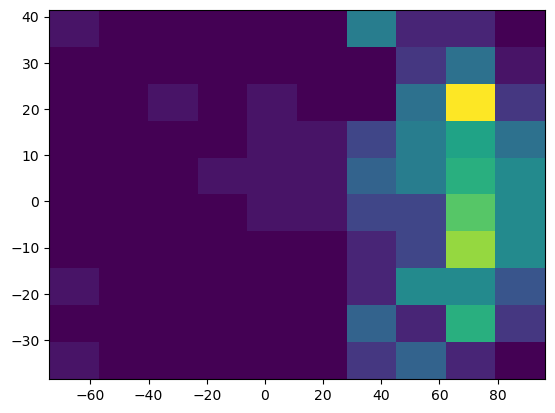

In [32]:
plt.hist2d(player_1['shotXCoord'], player_1['shotYCoord'])
plt.show()

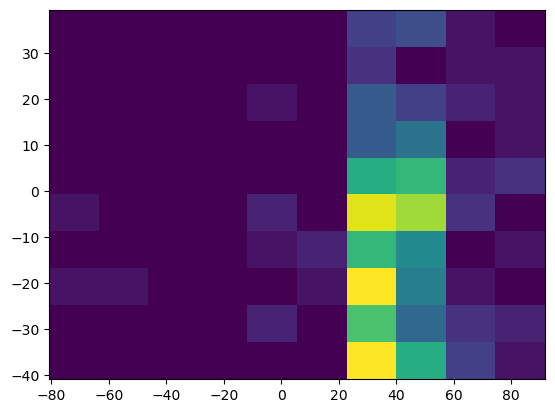

In [33]:
plt.hist2d(player_2['shotXCoord'], player_2['shotYCoord'])
plt.show()

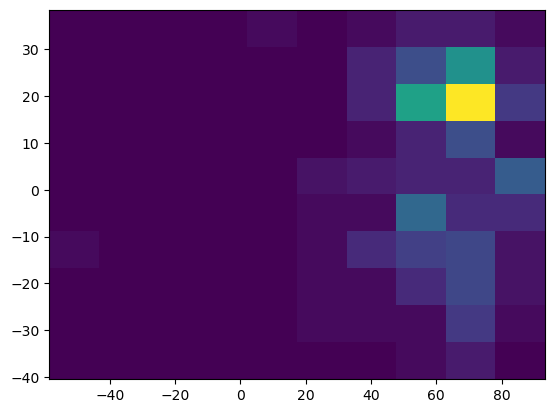

In [34]:
plt.hist2d(player_3['shotXCoord'], player_3['shotYCoord'])
plt.show()

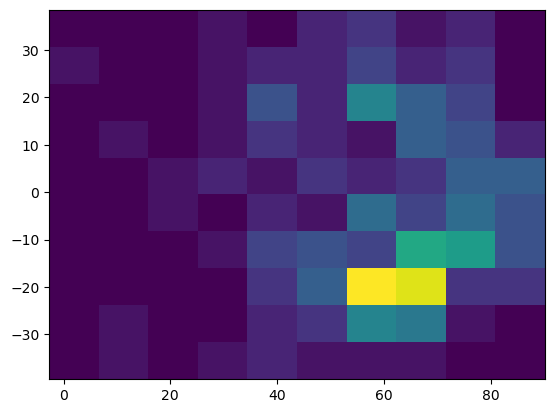

In [35]:
plt.hist2d(player_4['shotXCoord'], player_4['shotYCoord'])
plt.show()

From the heatmaps it appears as if (0,0) is not the center of the net and their distributions make it difficult to interpret who is a better shooter. With the present information I don't think these are useful but will leave them in here for completeness. 

Moving onto a different method of determining who is a better shooter. With the given information, it is sensible to use the xG calculation we just made. A good method to determine who is the best shooter is xG per shot compared to actual goals per shot. It is important to remember that xG is a metric that uses a bunch of shot factors across all 4 players to determine the likelihood of a goal. Players who out perform their xG are likely to be better shooters. We also want to make sure we normalize the data by number of shots because players who shoot *more* are not necessarily better.

In [36]:
player1_xGperShot = sum(player_1['xGoal'])/len(player_1['xGoal'])
player2_xGperShot = sum(player_2['xGoal'])/len(player_2['xGoal'])
player3_xGperShot = sum(player_3['xGoal'])/len(player_3['xGoal'])
player4_xGperShot = sum(player_4['xGoal'])/len(player_4['xGoal'])

print(player1_xGperShot)
print(player2_xGperShot)
print(player3_xGperShot)
print(player4_xGperShot)

0.054679999999999944
0.025279999999999976
0.061519999999999915
0.04599999999999992


Let's see how the number of expected goals per shot aligns with actual goals per shot.

In [37]:
player1_GperShot = sum(player_1['shotResult'])/len(player_1['shotResult'])
player2_GperShot = sum(player_2['shotResult'])/len(player_2['shotResult'])
player3_GperShot = sum(player_3['shotResult'])/len(player_3['shotResult'])
player4_GperShot = sum(player_4['shotResult'])/len(player_4['shotResult'])

print(player1_GperShot)
print(player2_GperShot)
print(player3_GperShot)
print(player4_GperShot)

0.064
0.032
0.072
0.048


In [38]:
print(player1_GperShot - player1_xGperShot)
print(player2_GperShot - player2_xGperShot)
print(player3_GperShot - player3_xGperShot)
print(player4_GperShot - player4_xGperShot)

0.009320000000000057
0.0067200000000000246
0.01048000000000008
0.002000000000000078


Given this information, player 3 outperforms their xG per shot by the most and player 2 "outperforms" their xG per shot the least. Since player 3 scores the most goals per shot and outperforms their xG per shot the most I would call him the best shooter. Player 1 doesn't outperform his xG by much but scores 0.064 goals per shot which is second highest so I would rank him the second best shooter. Player 4 outperforms his xG per shot and scores more than player 2 so I would rank him third leaving player 2 ranked fourth. The final ranking of players are as follows:
- Player 3
- Player 1
- Player 4
- Player 2

### Attached is a sample of player tracking data (trackingData.csv) with a full game’s worth of time and location data for four players. Write a script to summarize each player’s average speed for every shift in the game while a skater is on the ice. What is each player’s maximum speed and maximum acceleration and how far does each player skate in total? While this is a sample of data, the full set of data for all players and all games is large so beyond being the correct calculation, script performance is also important. In addition, rank the four players from best skating ability to worst and explain how you arrived at these rankings. Please include all code.

In [39]:
# Load in the data
skate_df = pd.read_csv('./trackingData_v2.csv')
skate_df

,ClockState,UTCTime,Location.X,Location.Y,OnPlayingSurface,Period,player
0,ClockStateStopped,1.677025e+09,-19.306206,46.000686,False,1,4
1,ClockStateRunning,1.677025e+09,-19.303114,46.029305,False,1,4
2,ClockStateRunning,1.677025e+09,-19.283734,46.080554,False,1,4
3,ClockStateRunning,1.677025e+09,-19.319893,46.091527,False,1,4
4,ClockStateRunning,1.677025e+09,-19.476785,45.394816,False,1,4
...,...,...,...,...,...,...,...
72871,ClockStateStopped,1.677026e+09,-28.875547,47.294990,False,1,3
72872,ClockStateStopped,1.677026e+09,-29.114467,47.187199,False,1,3
72873,ClockStateStopped,1.677026e+09,-31.704633,47.885755,False,1,3
72874,ClockStateStopped,1.677026e+09,-32.992853,47.061064,False,1,3


In [40]:
# Sort by player and UTCTime
skate_df = skate_df.sort_values(by = ['player','UTCTime']).reset_index(drop = True)
skate_df

,ClockState,UTCTime,Location.X,Location.Y,OnPlayingSurface,Period,player
0,ClockStateStopped,1.677025e+09,-13.551661,44.835006,False,1,1
1,ClockStateStopped,1.677025e+09,-13.550508,44.833068,False,1,1
2,ClockStateRunning,1.677025e+09,-13.541038,44.835774,False,1,1
3,ClockStateRunning,1.677025e+09,-13.541038,44.835774,False,1,1
4,ClockStateRunning,1.677025e+09,-13.560463,44.843034,False,1,1
...,...,...,...,...,...,...,...
72871,ClockStateRunning,1.677033e+09,-24.414550,30.381280,True,3,4
72872,ClockStateRunning,1.677033e+09,-25.515315,30.010443,True,3,4
72873,ClockStateRunning,1.677033e+09,-26.546317,29.651481,True,3,4
72874,ClockStateRunning,1.677033e+09,-27.479540,29.292413,True,3,4


In [41]:
# Calculate the magnitude of the distance skated by each player across each time step
skate_diff = skate_df.groupby('player')[['UTCTime','Location.X','Location.Y']].diff()
dist = np.sqrt(skate_diff['Location.X']**2 + skate_diff['Location.Y']**2)
skate_df['distance'] = dist

In [42]:
# Add the shift number to the dataframe
# NOTE: This number will be reflective of when 'OnPlayingSurface' changes from either False to True or
# True to False, we will only care about the "True" values in our analysis so the shift numbers will
# increment by 2 instead of by 1.
skate_df['shift'] = skate_df.groupby('player')['OnPlayingSurface']\
                            .transform(lambda x: x.ne(x.shift()).cumsum())

In [43]:
# Calculate the cumulative distance skated by each player in a given shift
skate_df['cumulative_distance'] = skate_df.groupby(['player','shift'])['distance'].cumsum()

In [44]:
# Calculate the distance skated per shift on ice by grouping by player and shift,
# applying a lambda function to ensure 'OnPlayingSurface' is True
# regrouping by player and shift
# taking the last value (since cumulative distance is cumulative this will be the total
# distance skated)
distance_per_shift = skate_df.groupby(['player','shift'])\
                             .apply(lambda x: x[x['OnPlayingSurface'] == True])['cumulative_distance']\
                             .groupby(['player','shift'])\
                             .last()

# Calculate the time of each shift on ice by grouping by player and shift,
# applying a lambda function to ensure 'OnPlayingSurface' is True
# regrouping by player and shift
# taking the last value of time minus the first value of time
time_per_shift = skate_df.groupby(['player','shift'])\
                         .apply(lambda x: x[x['OnPlayingSurface'] == True])['UTCTime']\
                         .groupby(['player','shift'])\
                         .agg(lambda x: x.iat[-1] - x.iat[0])

In [45]:
# The average speed per shift on ice is the distance per shift divided by the time of the shift
speed_per_shift = distance_per_shift / time_per_shift

In [46]:
# Display the results
print(speed_per_shift.to_string())

player  shift
1       2        10.668144
        4        13.314308
        6         6.379083
        8        12.257717
        10        5.519291
        12       12.055474
        14        8.587297
        16       10.727400
        18        9.592581
        20        3.310374
        22       11.554070
        24       17.946558
        26       11.118055
        28        4.926270
        30       12.261984
2       1        14.782852
        3        14.302647
        5        11.848143
        7         4.576839
        9         7.236955
        11        4.028762
        13        7.764957
        15       11.067085
        17        7.734590
        19        4.931288
        21       12.161322
        23        7.261253
        25        6.175693
        27        8.945694
        29       10.568599
        31        6.230282
        33        4.431422
        35       14.794869
        37        2.833592
        39        5.530260
        41       10.020883
        43    

In [47]:
# Calculate the total distance skated by each player by summing
# the distance skated in each shift. The flow of groupbys follows
# a patter similar to above
total_distance = skate_df.groupby(['player','shift'])\
                         .apply(lambda x: x[x['OnPlayingSurface'] == True])['cumulative_distance']\
                         .groupby(['player','shift'])\
                         .last()\
                         .groupby('player')\
                         .sum()

print(total_distance)

player
1    10891.380411
2    16216.435969
3     3378.890458
4    18544.660357
Name: cumulative_distance, dtype: float64


In [48]:
# Add 'player' and 'OnPlayingSurface' columns 
skate_diff = skate_df.groupby('player')[['UTCTime','Location.X','Location.Y']].diff()
skate_diff['player'] = skate_df['player']
skate_diff['OnPlayingSurface'] = skate_df['OnPlayingSurface']
skate_diff['AbsoluteTime'] = skate_df['UTCTime']

In [49]:
skate_diff['velocity'] = abs(( np.sqrt(skate_diff['Location.X'].shift()**2 + 
                                   skate_diff['Location.Y'].shift()**2) -
                              np.sqrt(skate_diff['Location.X']**2 +
                                   skate_diff['Location.Y']**2) ) /\
                             ( skate_diff['UTCTime'].shift() - skate_diff['UTCTime'] ))

In [50]:
# The time step is sometimes equal to zero so there are infinite values,
# drop those along with the na's from using .diff()
skate_diff.replace([np.inf, -np.inf], np.nan, inplace=True)
skate_diff.dropna(inplace = True)

In [51]:
# Only use the times the players are on the ice
# There is also an interesting phenomenon with how the times
# are reported such that there are impossibly high velocities.
# After invesitgating histograms I decided to use a velocity of 80
# as a cap. This produced the most resonable distribution of 
# skating velocities without cutting too much data.
skate_diff = skate_diff[(skate_diff['velocity'] <= 80) &
                        (skate_diff['OnPlayingSurface'] == True)]

<AxesSubplot: >

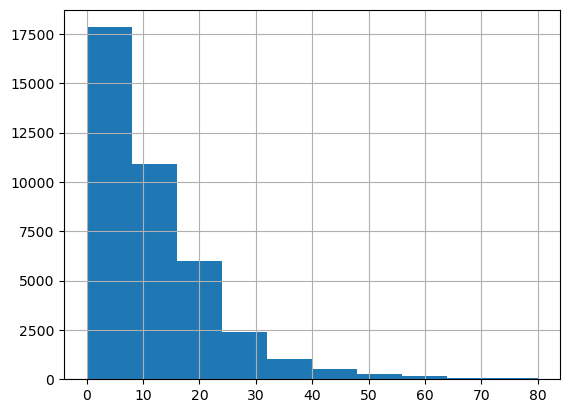

In [52]:
skate_diff['velocity'].hist()

In [53]:
# Calculate the acceleration, this part is giving me some trouble. 
# The time deltas are really small between velocities resulting in
# larger than possible accelerations. Similar to the velocity
# section, I will use histograms to cap the acceleration. From
# inspection, it looks as if 150 is a reasonable value as a cap.
acceleration = abs(skate_diff.groupby('player')['velocity'].diff())/skate_diff.groupby('player')['AbsoluteTime'].diff()
acceleration.replace([np.inf, -np.inf], np.nan, inplace=True)
acceleration.describe(percentiles = [0.10, 0.5, 0.90])

count    39234.000000
mean        69.488537
std         90.322981
min          0.000000
10%          4.374803
50%         37.968812
90%        172.593204
max        874.503670
dtype: float64

In [54]:
skate_diff['acceleration'] = acceleration
skate_diff = skate_diff.loc[(skate_diff['acceleration'] < 150)]

<AxesSubplot: >

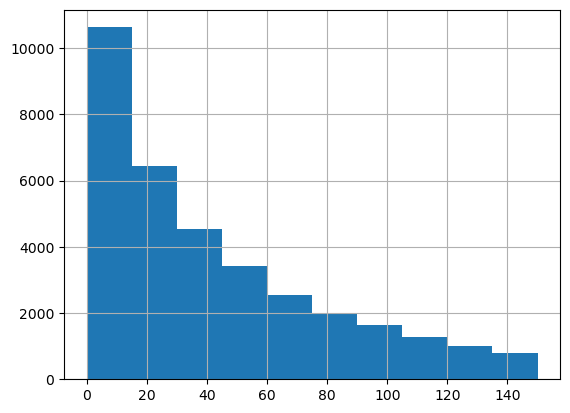

In [55]:
skate_diff['acceleration'].hist()

In [56]:
print("Max velocities:\n", skate_diff.groupby('player')['velocity'].max(), '\n')
print("Max accelerations:\n", skate_diff.groupby('player')['acceleration'].max())

Max velocities:
 player
1    76.133788
2    77.035875
3    61.535550
4    76.518890
Name: velocity, dtype: float64 

Max accelerations:
 player
1    149.972988
2    149.941005
3    149.870685
4    149.997929
Name: acceleration, dtype: float64


All players end up having max velocities and accerlerations near the arbitrary caps I put in. I believe there would need to be some additional data cleaning done to appropriately calculate players velocities and accelerations but without a data dictionary this would be quite difficult to do. I will leave my results as is but am unsure if they are correct.

Before I move to the section about who the strongest skater is I will first summarize the questions that were asked for convenience.

In [57]:
print("Players speed per shift:\n", speed_per_shift.to_string())

Players speed per shift:
 player  shift
1       2        10.668144
        4        13.314308
        6         6.379083
        8        12.257717
        10        5.519291
        12       12.055474
        14        8.587297
        16       10.727400
        18        9.592581
        20        3.310374
        22       11.554070
        24       17.946558
        26       11.118055
        28        4.926270
        30       12.261984
2       1        14.782852
        3        14.302647
        5        11.848143
        7         4.576839
        9         7.236955
        11        4.028762
        13        7.764957
        15       11.067085
        17        7.734590
        19        4.931288
        21       12.161322
        23        7.261253
        25        6.175693
        27        8.945694
        29       10.568599
        31        6.230282
        33        4.431422
        35       14.794869
        37        2.833592
        39        5.530260
        41     

In [58]:
print("Max speeds:\n", skate_diff.groupby('player')['velocity'].max(), '\n')
print("Max accelerations:\n", skate_diff.groupby('player')['acceleration'].max())

Max speeds:
 player
1    76.133788
2    77.035875
3    61.535550
4    76.518890
Name: velocity, dtype: float64 

Max accelerations:
 player
1    149.972988
2    149.941005
3    149.870685
4    149.997929
Name: acceleration, dtype: float64


In [59]:
print("Total distance traveled:\n", total_distance)

Total distance traveled:
 player
1    10891.380411
2    16216.435969
3     3378.890458
4    18544.660357
Name: cumulative_distance, dtype: float64


In [60]:
speed_per_shift.groupby(['player']).describe()

,count,mean,std,min,25%,50%,75%,max
player,,,,,,,,
1,15.0,10.014574,3.770678,3.310374,7.483190,10.727400,12.156596,17.946558
2,23.0,8.529898,3.702661,2.833592,5.616341,7.734590,11.457614,14.794869
3,6.0,10.783056,3.431471,6.110255,8.226996,11.587451,12.927437,14.932238
4,25.0,9.730367,3.055829,3.704308,7.592592,9.578191,12.099656,15.869526


It would be tempting to say that player 3 is the strongest skater but with such a small sample size of shifts I would rank the players as following:
- Player 1
- Player 3
- Player 4
- Player 2

Player 1 had the highest average speed of any skater in a shift by over 2 units and has high percentile scores for his average speed so I will rank him the best. As mentioned above, player 3 was in the running for top skater but with the small sample size I knocked him down to number 2. He has the highest minimum average speed, the highest median speed, etc. Player 4 is clearly a better skater than player 2 but seemingly slightly worse than player 3. Player 2 is the weakest skater of the bunch having the lowest averages across the board. 

Thank you for the opportunity to complete this evaluation. I look forward to hearing from you.